# Set Up

In [ ]:
print('Installing packages...')
!pip install torch transformers==4.31.0 accelerate==0.21.0 sentencepiece==0.1.99 tokenizers==0.13.3 datasets==2.15.0 tqdm zstandard

Installing packages...


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
import tqdm
import torch
from torch import nn
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
from functools import partial
import gc

In [ ]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from transformers import AutoModelForCausalLM, AutoTokenizer
import numpy as np

# Load the OPT-350M model and tokenizer
model_name = "facebook/opt-350m"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Sample text input
sample_text = "The quick brown fox jumps over the lazy dog. " * 5  # Extend input for more tokens
inputs = tokenizer(sample_text, return_tensors="pt")

# Hook to store activations
activations = {}

def activation_hook(layer_name):
    def hook(module, input, output):
        activations[layer_name] = output[0]  # Assume batch size of 1
    return hook

# Register hooks for linear layers
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):
        module.register_forward_hook(activation_hook(name))

# Forward pass
with torch.no_grad():
    model(**inputs)

# Plot 3D activation map
def plot_3d_activations(activation_tensor, layer_name):
    tokens = activation_tensor.size(0)  # Number of tokens
    channels = activation_tensor.size(1)  # Number of channels

    X, Y = np.meshgrid(range(channels), range(tokens))
    Z = activation_tensor.abs().cpu().detach().numpy()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")
    ax.set_title(f"Activation Map for {layer_name}")
    ax.set_xlabel("Channel")
    ax.set_ylabel("Token")
    ax.set_zlabel("Absolute Value")
    plt.show()

# Visualize activations for each layer
for name, activation in activations.items():
    plot_3d_activations(activation, name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
testenc = load_dataset('wikitext', 'wikitext-2-raw-v1', split='validation')
testenc = tokenizer("\n\n".join(testenc['text']), return_tensors='pt')
testenc = testenc.input_ids.to(model.device)

# Hook to store activations
activations = {}

def activation_hook(layer_name):
    def hook(module, input, output):
        activations[layer_name] = output[0]  # Assume batch size of 1
    return hook

# Register hooks for linear layers
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):
        module.register_forward_hook(activation_hook(name))
        break

# Forward pass
with torch.no_grad():
    model(**inputs)

# Plot 3D activation map
def plot_3d_activations(activation_tensor, layer_name):
    # Ensure the tensor has at least 2 dimensions
    if activation_tensor.dim() == 1:
        activation_tensor = activation_tensor.unsqueeze(0)  # Add a token dimension

    if activation_tensor.dim() == 2:
        tokens = activation_tensor.size(0)  # Number of tokens
        channels = activation_tensor.size(1)  # Number of channels

        X, Y = np.meshgrid(range(channels), range(tokens))
        Z = activation_tensor.abs().cpu().detach().numpy()

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection="3d")
        ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")
        ax.set_title(f"Activation Map for {layer_name}")
        ax.set_xlabel("Channel")
        ax.set_ylabel("Token")
        ax.set_zlabel("Absolute Value")
        ax.set_zlim(0, 8)
        plt.show()
    else:
        print(f"Skipping {layer_name}: Unexpected shape {activation_tensor.shape}")

# Visualize activations for each layer
for name, activation in activations.items():
    plot_3d_activations(activation, name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


KeyboardInterrupt: 

Plotting weights for model.decoder.embed_tokens.weight with shape torch.Size([50272, 512])


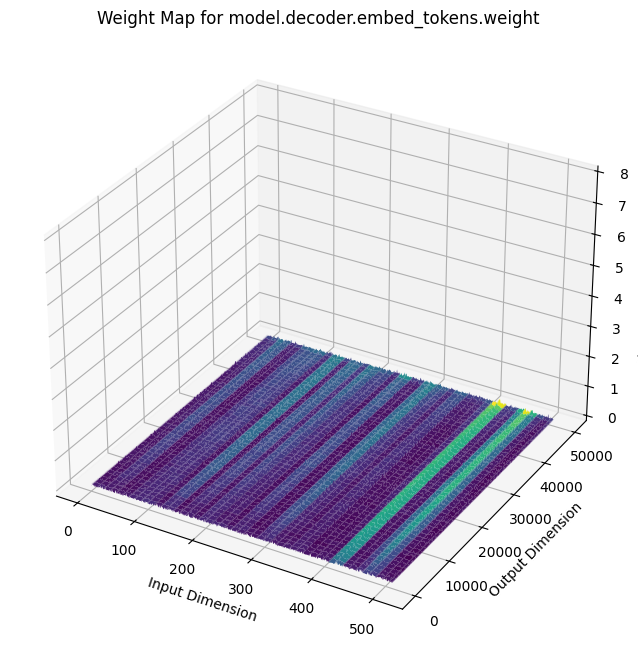

Plotting weights for model.decoder.embed_positions.weight with shape torch.Size([2050, 1024])


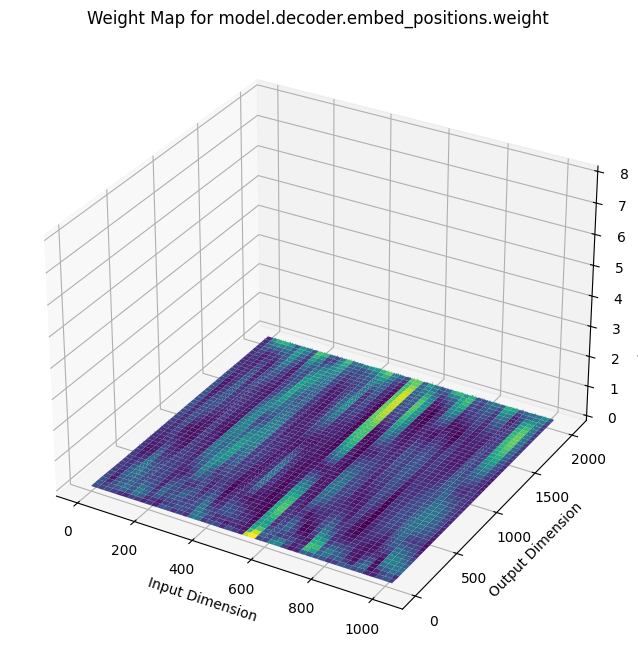

Plotting weights for model.decoder.project_out.weight with shape torch.Size([512, 1024])


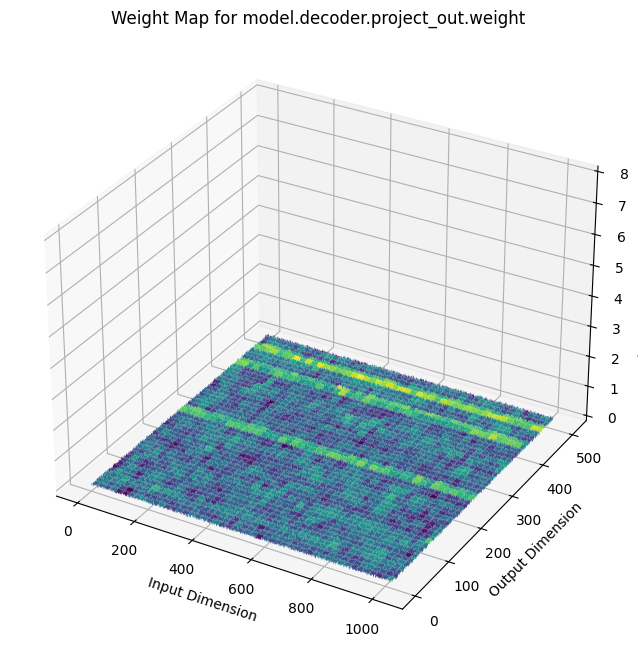

Plotting weights for model.decoder.project_in.weight with shape torch.Size([1024, 512])


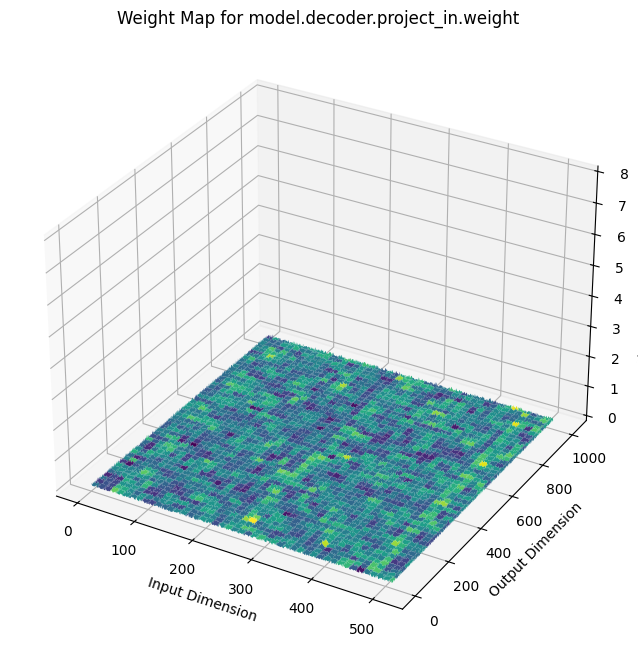

Plotting weights for model.decoder.layers.0.self_attn.k_proj.weight with shape torch.Size([1024, 1024])


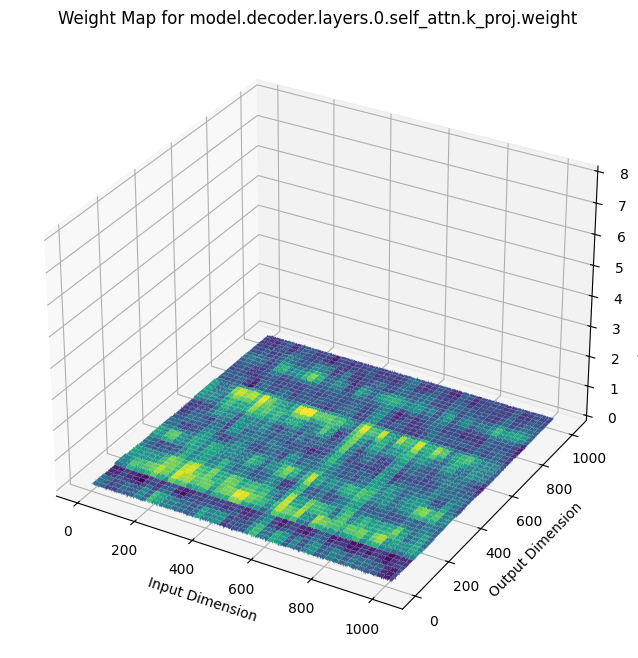

Plotting weights for model.decoder.layers.0.self_attn.v_proj.weight with shape torch.Size([1024, 1024])


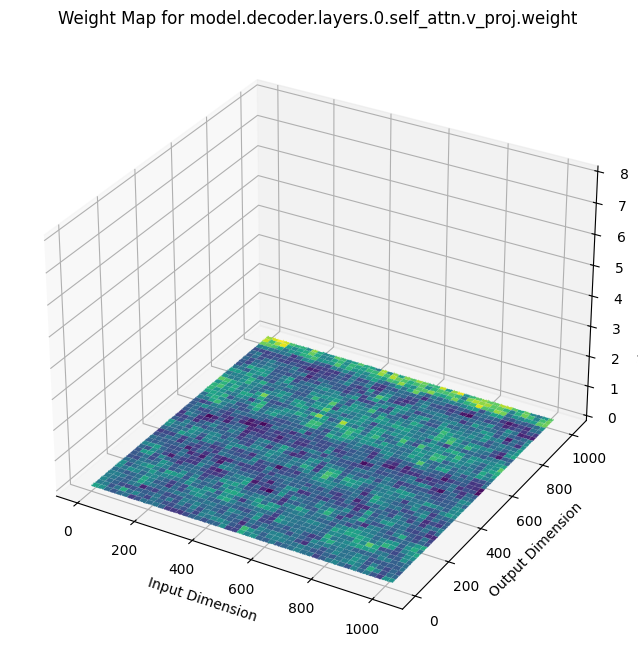

Plotting weights for model.decoder.layers.0.self_attn.q_proj.weight with shape torch.Size([1024, 1024])


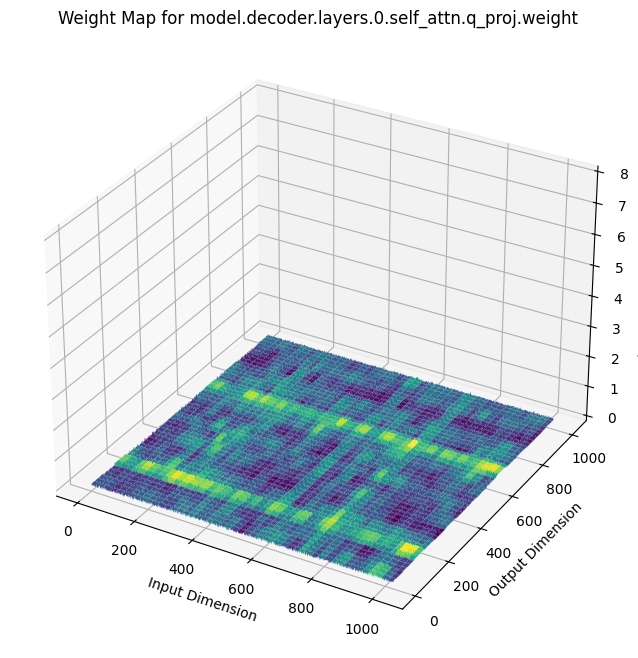

Plotting weights for model.decoder.layers.0.self_attn.out_proj.weight with shape torch.Size([1024, 1024])


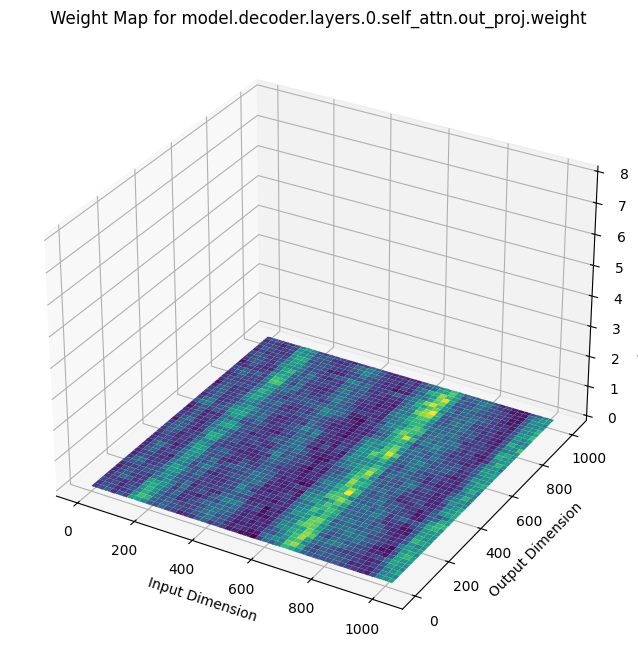

Skipping model.decoder.layers.0.self_attn_layer_norm.weight: Unexpected shape torch.Size([1024])
Plotting weights for model.decoder.layers.0.fc1.weight with shape torch.Size([4096, 1024])


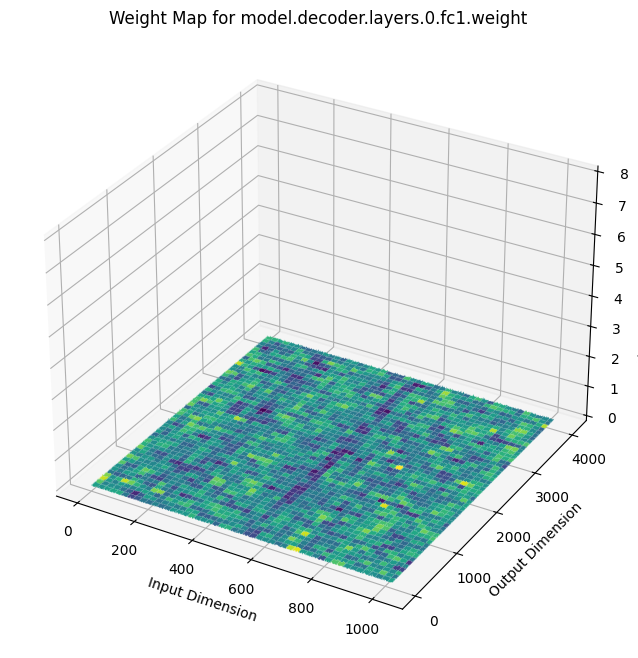

Plotting weights for model.decoder.layers.0.fc2.weight with shape torch.Size([1024, 4096])


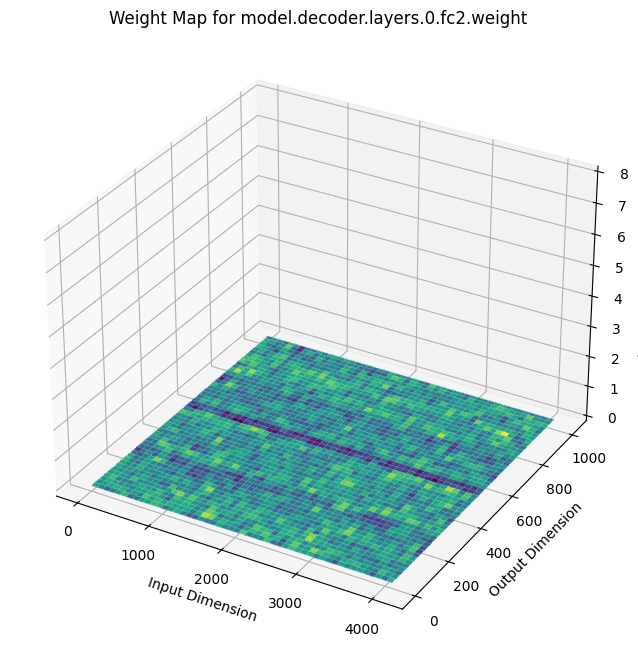

Skipping model.decoder.layers.0.final_layer_norm.weight: Unexpected shape torch.Size([1024])
Plotting weights for model.decoder.layers.1.self_attn.k_proj.weight with shape torch.Size([1024, 1024])


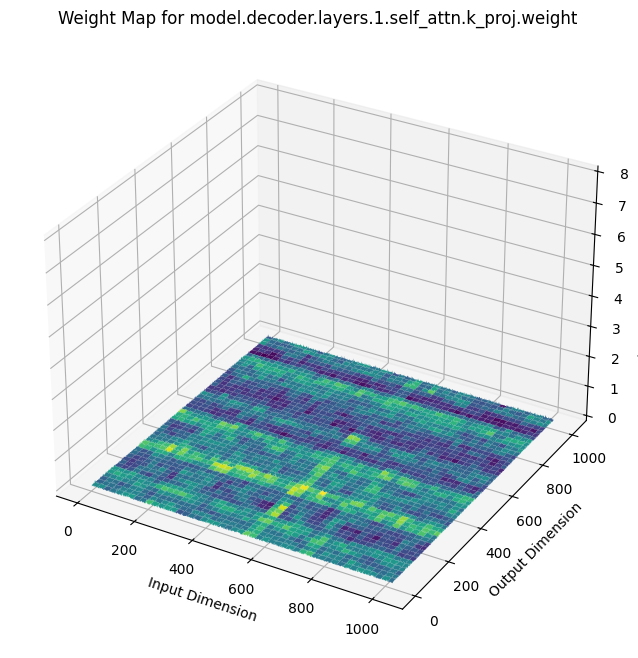

Plotting weights for model.decoder.layers.1.self_attn.v_proj.weight with shape torch.Size([1024, 1024])


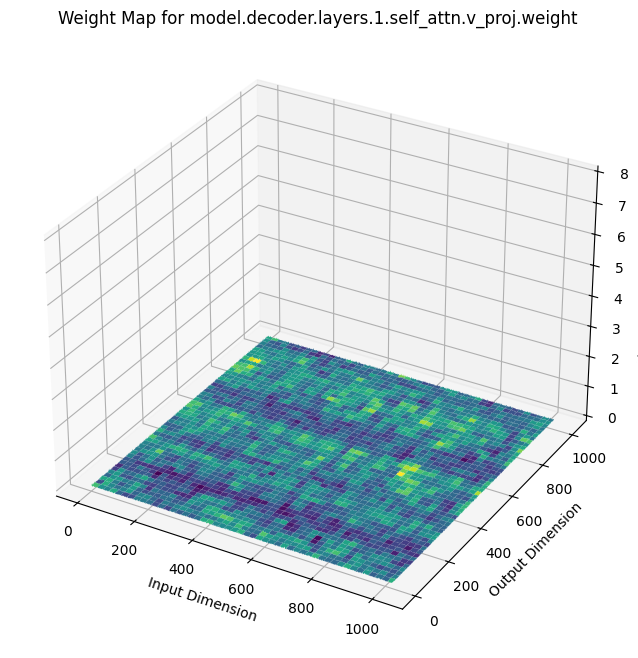

Plotting weights for model.decoder.layers.1.self_attn.q_proj.weight with shape torch.Size([1024, 1024])


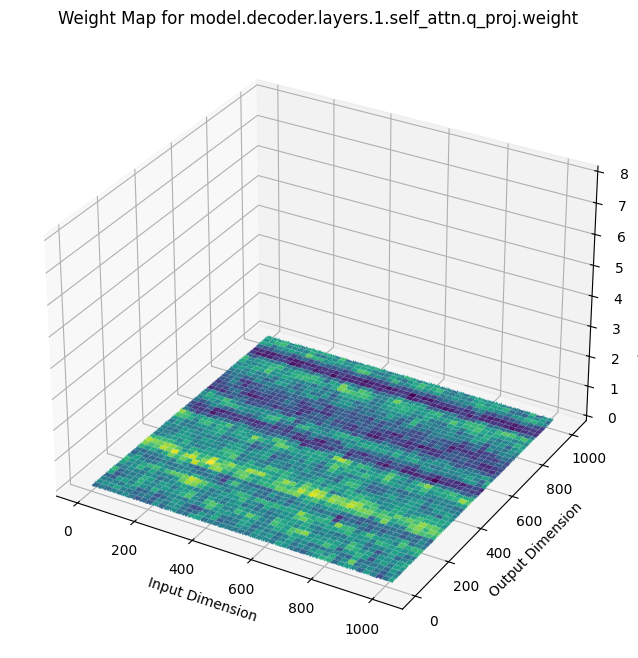

Plotting weights for model.decoder.layers.1.self_attn.out_proj.weight with shape torch.Size([1024, 1024])


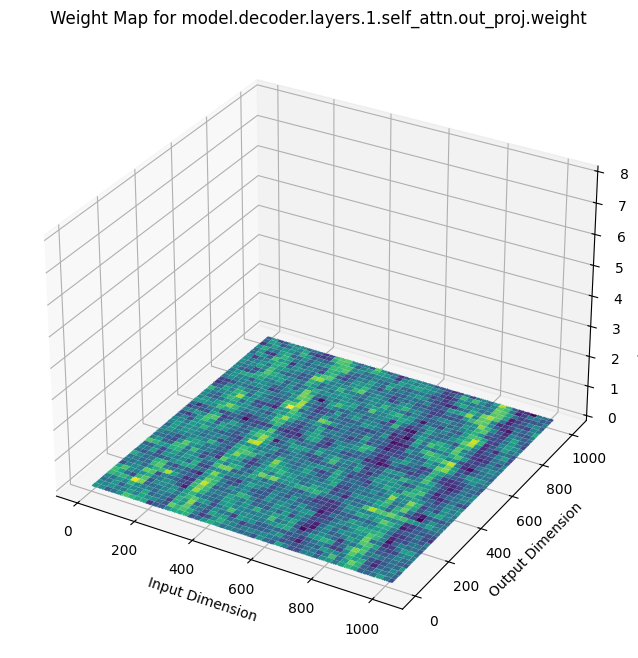

Skipping model.decoder.layers.1.self_attn_layer_norm.weight: Unexpected shape torch.Size([1024])
Plotting weights for model.decoder.layers.1.fc1.weight with shape torch.Size([4096, 1024])


KeyboardInterrupt: 

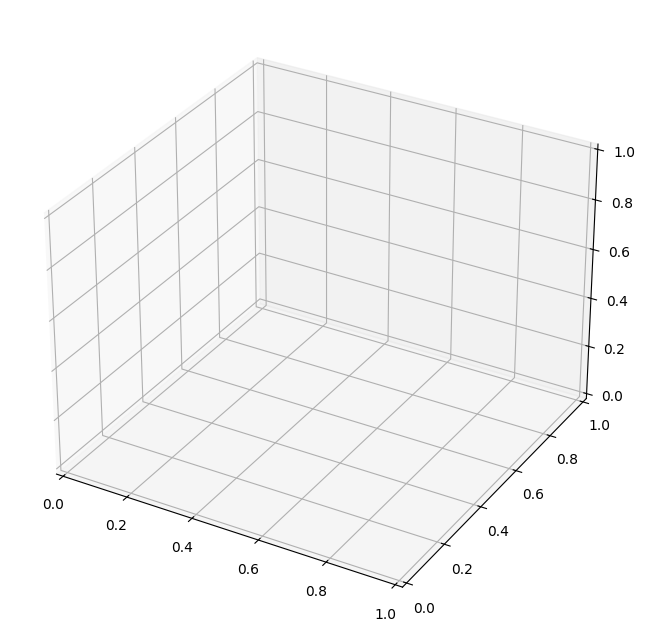

In [ ]:
def plot_3d_weights(weight_tensor, layer_name):
    output_dim = weight_tensor.size(0)  # Number of output channels
    input_dim = weight_tensor.size(1)  # Number of input channels

    X, Y = np.meshgrid(range(input_dim), range(output_dim))
    Z = weight_tensor.abs().cpu().detach().numpy()  # Take absolute values for visualization

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")
    ax.set_title(f"Weight Map for {layer_name}")
    ax.set_xlabel("Input Dimension")
    ax.set_ylabel("Output Dimension")
    ax.set_zlabel("Absolute Weight Value")
    ax.set_zlim(0, 8)
    plt.show()

# Loop through all model parameters
for name, param in model.named_parameters():
    if "weight" in name:  # Only consider weight tensors
        if param.dim() == 2:  # Ensure weights are 2D
            print(f"Plotting weights for {name} with shape {param.shape}")
            plot_3d_weights(param, name)
        else:
            print(f"Skipping {name}: Unexpected shape {param.shape}")

## Helper Function (Copied from Lab 4)

In [ ]:
def evaluate(model, tokenizer):
    '''
    This function evaluates the perplexity of the model
    '''
    testenc = load_dataset('wikitext', 'wikitext-2-raw-v1', split='test')
    testenc = tokenizer("\n\n".join(testenc['text']), return_tensors='pt')

    testenc = testenc.input_ids.to(model.device)
    nsamples = testenc.shape[1]//2048
    model = model.eval()

    nlls = []
    for i in tqdm.tqdm(range(nsamples), desc="evaluating..."):
        batch = testenc[:, (i * 2048):((i + 1) * 2048)].to(model.device)
        with torch.no_grad():

            lm_logits = model(batch).logits
        shift_logits = lm_logits[:, :-1, :].contiguous().float()
        shift_labels = testenc[:, (i * 2048):((i + 1) * 2048)][:, 1:]
        loss_fct = nn.CrossEntropyLoss()
        loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
        neg_log_likelihood = loss.float() * 2048
        nlls.append(neg_log_likelihood)

    return torch.exp(torch.stack(nlls).sum() / (nsamples * 2048))

In [ ]:
def get_model_size(model: nn.Module, data_width=16, group_size=-1):

    if group_size != -1:
        data_width += (16 + 4) / group_size

    num_elements = 0
    for param in model.parameters():
        num_elements += param.numel()
    return num_elements * data_width

Byte = 8
KiB = 1024 * Byte
MiB = 1024 * KiB
GiB = 1024 * MiB

In [ ]:
model_path = "facebook/opt-350m"
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=False)
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    device_map="auto"
)

# Evaluate the model
# model_perplexity = evaluate(model, tokenizer)
# model_size = get_model_size(model, data_width=16, group_size=128)
# print(f"\nmodel perplexity: {model_perplexity:.2f}")
# print(f"model size: {model_size/MiB:.2f} MiB")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/663M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [ ]:
# core quantization method (simulated quantization)
def pseudo_quantize_tensor(w, n_bit=4, q_group_size=-1):
    org_w_shape = w.shape
    if q_group_size > 0:
        assert org_w_shape[-1] % q_group_size == 0
        w = w.reshape(-1, q_group_size)

    assert w.dim() == 2
    # Calculate the maximum (\alpha) and minimum values (\beta) in the tensor.
    max_val = w.amax(dim=1, keepdim=True)
    assert max_val.dim() == 2 and max_val.size(0) == w.size(0) and max_val.size(1) == 1
    min_val = w.amin(dim=1, keepdim=True)
    assert min_val.dim() == 2 and min_val.size(0) == w.size(0) and min_val.size(1) == 1
    # Calculate the scale factor and zero point.  (Formula 1 & 2)
    max_int = 2 ** n_bit - 1
    scales = (max_val - min_val).clamp(min=1e-5) / max_int
    assert scales.shape == max_val.shape
    zeros = (-torch.round(min_val / scales)).clamp_(0, max_int)
    assert scales.shape == min_val.shape
    assert torch.isnan(scales).sum() == 0
    assert torch.isnan(w).sum() == 0

    # Quantize W: Map values in the range [\beta, \alpha] to lie within [0, 2^b - 1] (Formula 3)
    w = torch.clamp(torch.round(w / scales) + zeros, 0, max_int)
    assert w.dim() == 2 and w.size(0) == scales.size(0) and w.size(1) == q_group_size

    # Dequantize W (pseudo quantization, the inverse transformation of Formula 3)
    w = (w - zeros) * scales
    assert w.dim() == 2 and w.size(0) == scales.size(0) and w.size(1) == q_group_size

    assert torch.isnan(w).sum() == 0

    w = w.reshape(org_w_shape)
    return w

@torch.no_grad()
def pseudo_quantize_model_weight(
    model, w_bit, q_group_size,
):
    for n, m in model.named_modules():
        if isinstance(m, nn.Linear):
            m.weight.data = pseudo_quantize_tensor(m.weight.data, n_bit=w_bit, q_group_size=q_group_size)

## Naive Quantization Evaluation (Quantize all weights)

In [ ]:
del model
gc.collect()
torch.cuda.empty_cache()
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
pseudo_quantize_model_weight(model, w_bit=4, q_group_size=128)

# Evaluate the model
model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=4, group_size=128)
print(f"\nmodel perplexity: {model_perplexity:.2f}")
print(f"model size: {model_size/MiB:.2f} MiB")

Some weights of OPTForCausalLM were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 140/140 [01:40<00:00,  1.40it/s]


model perplexity: 27.27
model size: 164.10 MiB


The following functions are for importance calculation for salient weights.

In [ ]:
def get_calib_dataset(tokenizer=None, n_samples=256, block_size=512):
    dataset = load_dataset("mit-han-lab/pile-val-backup", split="validation")
    dataset = dataset.shuffle(seed=42)
    samples = []
    n_run = 0
    for data in dataset:
        line = data["text"]
        line = line.strip()
        line_encoded = tokenizer.encode(line)
        if len(line_encoded) > block_size:
            continue
        sample = torch.tensor([line_encoded])
        if sample.numel() == 0:
            continue
        samples.append(sample)
        n_run += 1
        if n_run == n_samples:
            break

    # now concatenate all samples and split according to block size
    cat_samples = torch.cat(samples, dim=1)
    n_split = cat_samples.shape[1] // block_size
    print(f" * Split into {n_split} blocks")
    return [cat_samples[:, i*block_size:(i+1)*block_size] for i in range(n_split)]




@torch.no_grad()
def get_calib_feat(model, tokenizer):
    input_dict = dict()
    def stat_input_max_hook(m, x, y, name):
        if isinstance(x, tuple):
            x = x[0]
        x_max = x.view(-1, x.shape[-1]).abs().mean(dim=0).cpu().detach()
        if name not in input_dict:
            input_dict[name] = [x_max]
        else:
            input_dict[name] += [x_max]

    hooks = []
    for name, m in model.named_modules():
        if isinstance(m, nn.Linear):
            hooks.append(
                m.register_forward_hook(
                    partial(stat_input_max_hook, name=name)))

    print("Collecting activation scales...")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    samples = get_calib_dataset(tokenizer)
    pbar = tqdm.tqdm(samples)
    for input_ids in pbar:
        input_ids = input_ids.to(device)
        model(input_ids)

    for hook in hooks:
        hook.remove()
    return input_dict



@torch.no_grad()
def get_calib_feat_smoothquant(model, tokenizer):
    input_dict = dict()
    def stat_input_max_hook(m, x, y, name):
        if isinstance(x, tuple):
            x = x[0]
        x_max = x.view(-1, x.shape[-1]).abs().max(dim=0).values.detach().cpu()
        if name not in input_dict:
            input_dict[name] = [x_max]
        else:
            input_dict[name] += [x_max]

    hooks = []
    for name, m in model.named_modules():
        if isinstance(m, nn.Linear):
            hooks.append(
                m.register_forward_hook(
                    partial(stat_input_max_hook, name=name)))

    print("Collecting activation scales...")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    samples = get_calib_dataset(tokenizer)
    pbar = tqdm.tqdm(samples)
    for input_ids in pbar:
        input_ids = input_ids.to(device)
        model(input_ids)

    for hook in hooks:
        hook.remove()
    return input_dict

In [ ]:
del model
gc.collect()
torch.cuda.empty_cache()
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
input_feat = get_calib_feat(model, tokenizer)
input_smooth_feat = get_calib_feat_smoothquant(model, tokenizer)

Some weights of OPTForCausalLM were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Repo card metadata block was not found. Setting CardData to empty.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

 * Split into 127 blocks


100%|██████████| 127/127 [00:18<00:00,  6.70it/s]


Repo card metadata block was not found. Setting CardData to empty.


 * Split into 127 blocks


 83%|████████▎ | 106/127 [00:16<00:03,  6.45it/s]

# W4A4 Quantization

This code is based on the `pseudo_quantize_model_weight_scaleup` function in lab 4. Added hooks for quantization of activations. (This is AWQ-like algorithm.)

In [ ]:
@torch.no_grad()
def pseudo_quantize_model_WnAn_scaleup(
    model, w_bit, q_group_size, input_feat, scale_factor = 1, quantize_activation = False #we fix the scale to be 1 for w4a4
):
    def hook_wrapper(scale_factor):
      def activation_quantize_hook(module, input, output):
            temp = output.clone()
            importance = output.mean(dim = 1)
            outlier_mask = torch.topk(importance, k = int(0.01*len(importance))).indices
            temp[outlier_mask, :] *= scale_factor
            temp = pseudo_quantize_tensor(temp, n_bit=w_bit, q_group_size=q_group_size)
            temp[outlier_mask, :] /= scale_factor
            return temp
      return activation_quantize_hook

    # Register hooks on all layers where activation quantization is needed
    hooks = []

    for n, m in model.named_modules():
        if isinstance(m, nn.Linear):

            importance = sum(input_feat[n]).float()

            outlier_mask = torch.topk(importance, k = int(0.01*len(importance))).indices
            assert outlier_mask.dim() == 1

            m.weight.data[:, outlier_mask] *= scale_factor

            m.weight.data = pseudo_quantize_tensor(m.weight.data, n_bit=w_bit, q_group_size=q_group_size)

            m.weight.data[:, outlier_mask] /= scale_factor

            if m.out_features != model.config.vocab_size and quantize_activation: #check for the last layer (maybe a better way) and see if we want to quantize activations
              hooks.append(m.register_forward_hook(hook_wrapper(scale_factor)))

    return hooks

W4A4 Quantiation

In [ ]:
@torch.no_grad()
def pseudo_smooth_quantize_model_WnAn(
    model, w_bit, input_smooth_feat, q_group_size, alpha = 0.5, eps = 1e-4#we fix the scale to be 1 for w4a4
):
    hooks = []

    linear_layers = [n for n,m in model.named_modules()]

    first_layer = linear_layers[0]
    last_layer = linear_layers[-1]

    def wrapper(scale_factor):
      def activation_quantize_hook(module, input):
          scaled_activations = input[0] / scale_factor
          quantized_scaled_activations = pseudo_quantize_tensor(scaled_activations, n_bit=w_bit, q_group_size=q_group_size)
          return scaled_activations * scale_factor
      return activation_quantize_hook


    for n, m in model.named_modules():
        if isinstance(m, nn.Linear):

            # max_activations = input_smooth_feat[n].cuda()
            max_activations = sum(input_smooth_feat[n]).float().cuda()
            max_weights = m.weight.data.abs().max(dim=0).values.detach()

            scale_factor = max_activations**alpha / (max_weights+eps)**(1-alpha)

            scale_factor.clamp_(min = eps).unsqueeze(0)

            m.weight.data *= scale_factor

            m.weight.data = pseudo_quantize_tensor(m.weight.data, n_bit=w_bit, q_group_size=q_group_size)

            m.weight.data /= scale_factor

            assert torch.isnan(m.weight.data).sum() == 0

            if m.out_features != model.config.vocab_size: #check for the last layer (maybe there is a better way)
              hooks.append(m.register_forward_pre_hook(wrapper(scale_factor)))


    return hooks

In [ ]:
del model
gc.collect()
torch.cuda.empty_cache()

# Step 1:  Get model and calculate importance
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")

# Step 2: Perform W4A4 Quantization without scaling
hooks = pseudo_smooth_quantize_model_WnAn(model, w_bit=8, q_group_size=128, input_smooth_feat=input_smooth_feat, eps = 1e-5, alpha = 0.4)

# Step 3: Evaluate the model of W4A4 Quantization without scaling
model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=4, group_size=64,)
print(f"\n W4A4 (without scaling) Model Perplexity: {model_perplexity:.2f}")
print(f"W4A4 (without scaling) Model Size: {model_size/MiB:.2f} MiB")


for hook in hooks:
  hook.remove()


Some weights of OPTForCausalLM were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
evaluating...: 100%|██████████| 140/140 [02:21<00:00,  1.01s/it]


 W4A4 (without scaling) Model Perplexity: 22.04
W4A4 (without scaling) Model Size: 170.26 MiB


## Perplexity of the original model

In [ ]:
del model
gc.collect()
torch.cuda.empty_cache()
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")

model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=16, group_size=128)
print(f"\n Original Model Perplexity: {model_perplexity:.2f}")
print(f" Original Model Size: {model_size/MiB:.2f} MiB")



In [ ]:
#validation
del model
gc.collect()
torch.cuda.empty_cache()
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")

model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=16, group_size=128)
print(f"\n Original Model Perplexity: {model_perplexity:.2f}")
print(f" Original Model Size: {model_size/MiB:.2f} MiB")



Some weights of OPTForCausalLM were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
evaluating...:  14%|█▍        | 20/140 [00:15<01:31,  1.31it/s]


KeyboardInterrupt: 

## W4A4 Quantization without scaling

In [ ]:
del model
gc.collect()
torch.cuda.empty_cache()

# Step 1:  Get model and calculate importance
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
input_feat = get_calib_feat(model, tokenizer)

# Step 2: Perform W4A4 Quantization without scaling
hooks = pseudo_quantize_model_WnAn_scaleup(model, w_bit=4, q_group_size=128, input_feat=input_feat, scale_factor=2,  quantize_activation = False)

# Step 3: Evaluate the model of W4A4 Quantization without scaling
model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=4, group_size=128,)
print(f"\n W4A4 (without scaling) Model Perplexity: {model_perplexity:.2f}")
print(f"W4A4 (without scaling) Model Size: {model_size/MiB:.2f} MiB")


for hook in hooks:
  hook.remove()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializa

Repo card metadata block was not found. Setting CardData to empty.


 * Split into 127 blocks


evaluating...: 100%|██████████| 140/140 [01:40<00:00,  1.39it/s]


 W4A4 (without scaling) Model Perplexity: 26.26
W4A4 (without scaling) Model Size: 164.10 MiB


In [ ]:
#validation

del model
gc.collect()
torch.cuda.empty_cache()

# Step 1:  Get model and calculate importance
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
input_feat = get_calib_feat(model, tokenizer)

# Step 2: Perform W4A4 Quantization without scaling
hooks = pseudo_quantize_model_WnAn_scaleup(model, w_bit=4, q_group_size=128, input_feat=input_feat, scale_factor=2,  quantize_activation = False)

# Step 3: Evaluate the model of W4A4 Quantization without scaling
model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=4, group_size=128,)
print(f"\n W4A4 (without scaling) Model Perplexity: {model_perplexity:.2f}")
print(f"W4A4 (without scaling) Model Size: {model_size/MiB:.2f} MiB")


for hook in hooks:
  hook.remove()

Some weights of OPTForCausalLM were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Repo card metadata block was not found. Setting CardData to empty.


 * Split into 127 blocks


100%|██████████| 127/127 [00:18<00:00,  6.81it/s]


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 140/140 [01:45<00:00,  1.33it/s]


 W4A4 (without scaling) Model Perplexity: 26.26
W4A4 (without scaling) Model Size: 164.10 MiB


In [ ]:
del model
del hooks

gc.collect()
torch.cuda.empty_cache()
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")

hooks = pseudo_quantize_model_WnAn_scaleup(model, w_bit=4, q_group_size=128, input_feat=input_feat, scale_factor=2,  quantize_activation = True) #W4A4

model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=4, group_size=128)
print(f"\n W4A4 (with 2x scaling) Model Perplexity: {model_perplexity:.2f}")
print(f"W4A4 (with 2x scaling) Model Size: {model_size/MiB:.2f} MiB")

for hook in hooks:
  hook.remove()

Some weights of OPTForCausalLM were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
evaluating...: 100%|██████████| 140/140 [02:21<00:00,  1.01s/it]


 W4A4 (with 2x scaling) Model Perplexity: 35.94
W4A4 (with 2x scaling) Model Size: 164.10 MiB


In [ ]:
#validation
del model
del hooks

gc.collect()
torch.cuda.empty_cache()
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")

hooks = pseudo_quantize_model_WnAn_scaleup(model, w_bit=4, q_group_size=128, input_feat=input_feat, scale_factor=2,  quantize_activation = True) #W4A4

model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=4, group_size=128)
print(f"\n W4A4 (with 2x scaling) Model Perplexity: {model_perplexity:.2f}")
print(f"W4A4 (with 2x scaling) Model Size: {model_size/MiB:.2f} MiB")

for hook in hooks:
  hook.remove()

Some weights of OPTForCausalLM were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
evaluating...: 100%|██████████| 140/140 [02:25<00:00,  1.04s/it]


 W4A4 (with 2x scaling) Model Perplexity: 35.94
W4A4 (with 2x scaling) Model Size: 164.10 MiB


In [ ]:
del model
del hooks

gc.collect()
torch.cuda.empty_cache()
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")

input_feat = get_calib_feat(model, tokenizer)

hooks = pseudo_quantize_model_WnAn_scaleup(model, w_bit=4, q_group_size=128, input_feat=input_feat, scale_factor=2,  quantize_activation = False) #AWQ Quantization

model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=4, group_size=128)
print(f"\n AWQ (with 2x scaling) Model Perplexity: {model_perplexity:.2f}")
print(f"AWQ (with 2x scaling) Model Size: {model_size/MiB:.2f} MiB")

if hooks is not None:
  for hook in hooks:
    hook.remove()

Some weights of OPTForCausalLM were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Repo card metadata block was not found. Setting CardData to empty.


 * Split into 127 blocks


evaluating...: 100%|██████████| 40/40 [00:29<00:00,  1.37it/s]


 AWQ (with 2x scaling) Model Perplexity: 26.17
AWQ (with 2x scaling) Model Size: 164.10 MiB


In [ ]:
del model
del hooks

gc.collect()
torch.cuda.empty_cache()
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")

input_feat = get_calib_feat(model, tokenizer)

hooks = pseudo_quantize_model_WnAn_scaleup(model, w_bit=8, q_group_size=128, input_feat=input_feat, scale_factor=2,  quantize_activation = False) #W4A4

model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=8, group_size=128)
print(f"\n AWQ to 8 bit (with 2x scaling) Model Perplexity: {model_perplexity:.2f}")
print(f"AWQ to 8 bit (with 2x scaling) Model Size: {model_size/MiB:.2f} MiB")

input_feat = get_calib_feat(model, tokenizer)
hooks = pseudo_quantize_model_WnAn_scaleup(model, w_bit=4, q_group_size=128, input_feat=input_feat, scale_factor=2,  quantize_activation = True) #W4A4

model_perplexity = evaluate(model, tokenizer)
model_size = get_model_size(model, data_width=4, group_size=128)

print(f"\n AWQ to 8 bit (with 2x scaling) Model Perplexity: {model_perplexity:.2f}")
print(f"AWQ to 8 bit (with 2x scaling) Model Size: {model_size/MiB:.2f} MiB")

if hooks is not None:
  for hook in hooks:
    hook.remove()

Some weights of OPTForCausalLM were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Repo card metadata block was not found. Setting CardData to empty.


 * Split into 127 blocks


evaluating...: 100%|██████████| 40/40 [00:29<00:00,  1.37it/s]



 AWQ to 8 bit (with 2x scaling) Model Perplexity: 21.93
AWQ to 8 bit (with 2x scaling) Model Size: 322.02 MiB


Repo card metadata block was not found. Setting CardData to empty.


 * Split into 127 blocks


evaluating...: 100%|██████████| 40/40 [00:39<00:00,  1.01it/s]


 AWQ to 8 bit (with 2x scaling) Model Perplexity: 35.60
AWQ to 8 bit (with 2x scaling) Model Size: 164.10 MiB


## Iterative Quantization

In [ ]:
del model
del hooks

gc.collect()
torch.cuda.empty_cache()
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")

num_iters = 5

input_feat = get_calib_feat(model, tokenizer)
eps = 1e-3
prev_perplexity = 0

for i in range(num_iters):

  hooks = pseudo_quantize_model_WnAn_scaleup(model, w_bit=4, q_group_size=128, input_feat=input_feat, scale_factor=1,  quantize_activation = True)

  print("-"*10, "Iter:", i, "-"*10)
  model_perplexity = evaluate(model, tokenizer)
  model_size = get_model_size(model, data_width=4, group_size=128)
  print(f"\n W4A4 (with 2x scaling) Model Perplexity: {model_perplexity:.2f}")
  print(f"W4A4 (with 2x scaling) Model Size: {model_size/MiB:.2f} MiB")
  print("-"*25)

  if abs(model_perplexity - prev_perplexity) <= eps:
    continue
  prev_perplexity = model_perplexity

for hook in hooks:
  hook.remove()

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

Repo card metadata block was not found. Setting CardData to empty.


 * Split into 127 blocks


100%|██████████| 127/127 [00:52<00:00,  2.41it/s]


---------- Iter: 0 ----------


evaluating...: 100%|██████████| 40/40 [01:38<00:00,  2.45s/it]



 W4A4 (with 2x scaling) Model Perplexity: 17.54
W4A4 (with 2x scaling) Model Size: 651.91 MiB
-------------------------
---------- Iter: 1 ----------


evaluating...: 100%|██████████| 40/40 [01:53<00:00,  2.84s/it]



 W4A4 (with 2x scaling) Model Perplexity: 17.52
W4A4 (with 2x scaling) Model Size: 651.91 MiB
-------------------------
---------- Iter: 2 ----------


evaluating...: 100%|██████████| 40/40 [02:35<00:00,  3.88s/it]



 W4A4 (with 2x scaling) Model Perplexity: 17.52
W4A4 (with 2x scaling) Model Size: 651.91 MiB
-------------------------
---------- Iter: 3 ----------


evaluating...: 100%|██████████| 40/40 [02:38<00:00,  3.96s/it]



 W4A4 (with 2x scaling) Model Perplexity: 17.63
W4A4 (with 2x scaling) Model Size: 651.91 MiB
-------------------------
---------- Iter: 4 ----------


evaluating...: 100%|██████████| 40/40 [02:49<00:00,  4.24s/it]


 W4A4 (with 2x scaling) Model Perplexity: 17.62
W4A4 (with 2x scaling) Model Size: 651.91 MiB
-------------------------


In [ ]:
for n, m in model.named_modules():
  if isinstance(m, nn.Linear):
    print(m.weight.reshape(-1, 128)[0].unique())
    break

tensor([-0.0252, -0.0216, -0.0144, -0.0108, -0.0072, -0.0036, -0.0018,  0.0000,
         0.0036,  0.0072,  0.0108,  0.0144,  0.0180,  0.0216,  0.0252,  0.0288],
       device='cuda:0', grad_fn=<Unique2Backward0>)


# Fine-Tuning


Check: https://huggingface.co/docs/transformers/en/training

In [ ]:
from datasets import load_dataset

# Load WikiText-2 dataset
fine_tuning_set = load_dataset('wikitext', 'wikitext-2-raw-v1', split = "validation")


# Tokenization function for OPT
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        truncation=True,
        padding="max_length",
        max_length=2048,  # OPT models typically work with longer sequences
    )



# Tokenize train and validation datasets
fine_tune_dataset = fine_tuning_set.map(tokenize_function, batched=True, remove_columns=["text"])

# Format the datasets for PyTorch
fine_tune_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])


Map:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [ ]:
fine_tune_dataset["input_ids"].shape, fine_tune_dataset["attention_mask"].shape

(torch.Size([3760, 2048]), torch.Size([3760, 2048]))

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import TrainingArguments, Trainer
torch.cuda.empty_cache()

# Define training arguments
training_args = TrainingArguments(
    output_dir="results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="logs",
    num_train_epochs=1,
    gradient_accumulation_steps=10,
    per_device_train_batch_size=1,  # Reduce batch size if GPU memory is limited
    learning_rate=5e-5,
    save_total_limit=2,
    fp16=True,
)

# Set up the Trainer
v = Trainer(
    model=model,
    args=training_args,
    train_dataset=fine_tune_dataset,
    tokenizer=tokenizer,
)

# Start training
trainer.train()



Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:427: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:1301: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  new_forward = torch.cuda.amp.autocast(dtype=t

OutOfMemoryError: CUDA out of memory. Tried to allocate 512.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 25.06 MiB is free. Process 11781 has 14.72 GiB memory in use. Of the allocated memory 14.40 GiB is allocated by PyTorch, and 203.56 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
    testenc = load_dataset('wikitext', 'wikitext-2-raw-v1', split='test')
    testenc = tokenizer("\n\n".join(testenc['text']), return_tensors='pt')

    testenc = testenc.input_ids.to(model.device)
    nsamples = 40
    model = model.eval()

    nlls = []
    for i in tqdm.tqdm(range(nsamples), desc="evaluating..."):
        batch = testenc[:, (i * 2048):((i + 1) * 2048)].to(model.device)
        with torch.no_grad():
            lm_logits = model(batch).logits
        shift_logits = lm_logits[:, :-1, :].contiguous().float()
        shift_labels = testenc[:, (i * 2048):((i + 1) * 2048)][:, 1:]
        loss_fct = nn.CrossEntropyLoss()
        loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
        neg_log_likelihood = loss.float() * 2048
        nlls.append(neg_log_likelihood)
